In [1]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pandas.api.types import is_numeric_dtype 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,minmax_scale
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt 



In [3]:
df=pd.read_csv("vehicles_model_ready_data.csv")

In [4]:
df=df.drop(['Unnamed: 0','paint_encoded'], axis=1)

In [5]:
df["odometer"] = np.sqrt(minmax_scale(df["odometer"]))

In [6]:
X=df.loc[:, ~df.columns.isin(['price'])]
y=df["price"]

In [7]:
#prepare categorical features
def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category') 


In [8]:
categorical_indicies = get_categorical_indicies(X)

In [9]:
convert_cats(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81424 entries, 0 to 81423
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   manufacturer            81424 non-null  category
 1   model                   81424 non-null  category
 2   condition               81424 non-null  float64 
 3   cylinders               81424 non-null  float64 
 4   odometer                81424 non-null  float64 
 5   title_status            81424 non-null  float64 
 6   age                     81424 non-null  float64 
 7   region_enc              81424 non-null  float64 
 8   fuel_diesel             81424 non-null  int64   
 9   fuel_electric           81424 non-null  int64   
 10  fuel_gas                81424 non-null  int64   
 11  fuel_hybrid             81424 non-null  int64   
 12  fuel_other              81424 non-null  int64   
 13  transmission_automatic  81424 non-null  int64   
 14  transmission_manual   

In [11]:
X_train, X_test, y_train, y_test= train_test_split( X, y, train_size=0.8, test_size=0.2, random_state=0 )
X_test, X_val, y_test, y_val= train_test_split( X_test, y_test, train_size=0.5, test_size=0.5, random_state=0 )

In [12]:

train_dataset = cb.Pool(X_train,y_train, cat_features=categorical_indicies)
test_dataset = cb.Pool(X_test,y_test, cat_features=categorical_indicies)
val_dataset=cb.Pool(X_val,y_val, cat_features=categorical_indicies)

In [13]:
model = cb.CatBoostRegressor(loss_function='RMSE',use_best_model=True)


In [14]:
model.fit(train_dataset,eval_set=(val_dataset))

Learning rate set to 0.101462
0:	learn: 9225.6664288	test: 9257.0672306	best: 9257.0672306 (0)	total: 127ms	remaining: 2m 6s
1:	learn: 8546.4619936	test: 8588.7038000	best: 8588.7038000 (1)	total: 183ms	remaining: 1m 31s
2:	learn: 7949.5505213	test: 8000.3158201	best: 8000.3158201 (2)	total: 240ms	remaining: 1m 19s
3:	learn: 7422.1212521	test: 7481.8738582	best: 7481.8738582 (3)	total: 294ms	remaining: 1m 13s
4:	learn: 6949.8471745	test: 7019.1938979	best: 7019.1938979 (4)	total: 342ms	remaining: 1m 8s
5:	learn: 6519.7388409	test: 6590.4010343	best: 6590.4010343 (5)	total: 396ms	remaining: 1m 5s
6:	learn: 6154.9855019	test: 6226.8510159	best: 6226.8510159 (6)	total: 447ms	remaining: 1m 3s
7:	learn: 5833.8230468	test: 5906.1283909	best: 5906.1283909 (7)	total: 492ms	remaining: 1m 1s
8:	learn: 5538.6312524	test: 5613.7845488	best: 5613.7845488 (8)	total: 539ms	remaining: 59.4s
9:	learn: 5288.1394148	test: 5368.3437755	best: 5368.3437755 (9)	total: 586ms	remaining: 58s
10:	learn: 5065.733

In [15]:
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1232.4067802520708
Mean Squared Error: 4108842.120595079
Root Mean Squared Error: 2027.0279032601102
R2:  0.9593323207965218


In [16]:
#learning curve
import matplotlib.pyplot as plt

#plt.style.use('seaborn')
#plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
#plt.ylabel('MSE', fontsize = 14)
#plt.xlabel('Training set size', fontsize = 14)
#plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
#plt.legend()
#plt.ylim(0,40)

In [17]:
fscores = []

for score in model.feature_importances_:
    fscores.append( score * 1000000 )

In [19]:
index_columns = X.columns

coef = pd.Series( fscores, index = index_columns )

imp_coef = coef.sort_values()

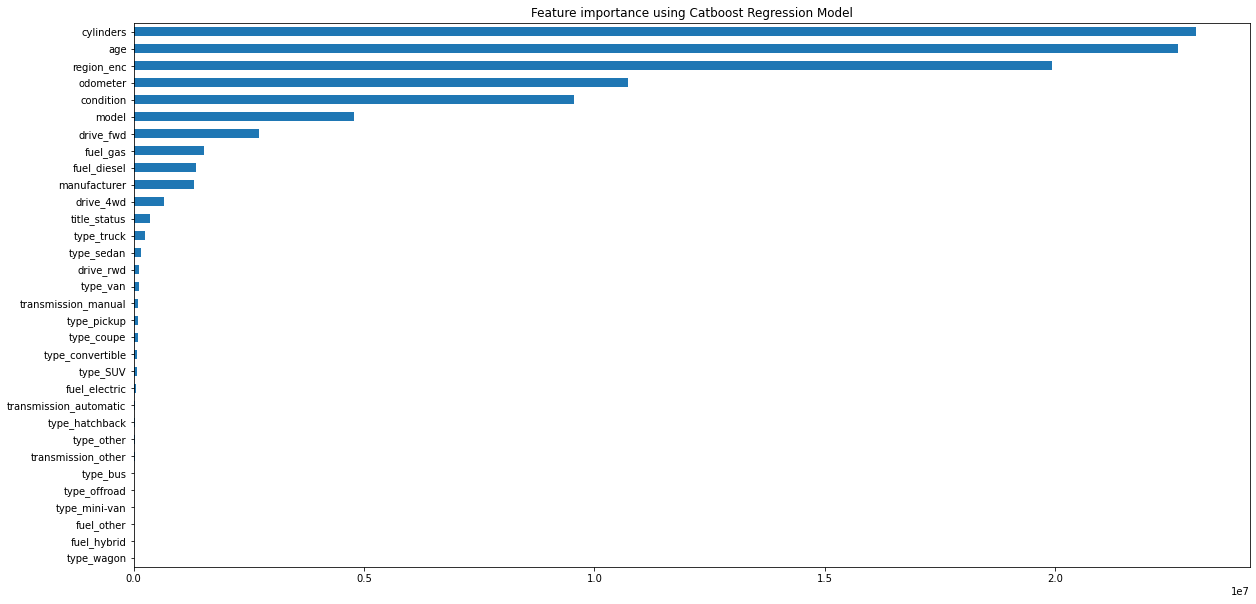

In [26]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

ax = imp_coef.plot( kind = "barh" )
ax.set_ylabel('',fontdict={'fontsize':4})
plt.title( "Feature importance using Catboost Regression Model" )
#plt.savefig('/home/ubuntu/01-Nuera/charts/XGBoost_Tuned_Features_Importance.jpg')
plt.show()